In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from myo_sam.inference.predictors.utils import split_image_into_patches

In [11]:
nuclei = cv2.cvtColor(cv2.imread("../assets/nuclei.tif"), cv2.COLOR_BGR2RGB)
myotubes = cv2.cvtColor(cv2.imread("../assets/myotube.tif"), cv2.COLOR_BGR2RGB)

In [9]:
def enhance_contrast_rgb(image: np.ndarray) -> np.ndarray:
    """Enhances the contrast of an RGB image by applying CLAHE to each channel separately."""
    clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8, 8))
    r_channel, g_channel, b_channel = cv2.split(image)
    clahe_r = clahe.apply(r_channel)
    clahe_g = clahe.apply(g_channel)
    clahe_b = clahe.apply(b_channel)
    enhanced_image = cv2.merge([clahe_r, clahe_g, clahe_b])
    return enhanced_image

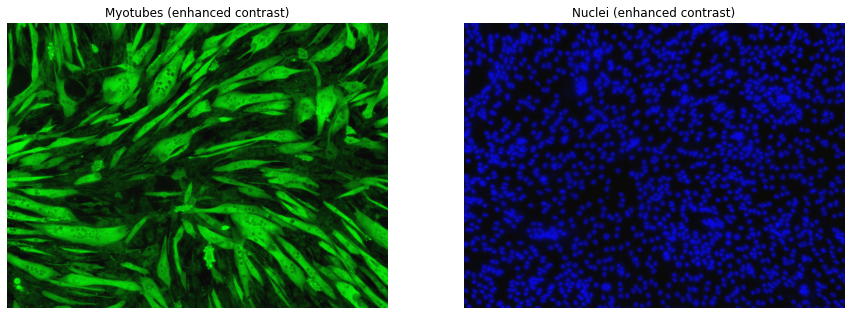

In [12]:
plt.figure(figsize=(15, 15))

plt.subplot(1,2,1)
plt.imshow(enhance_contrast_rgb(myotubes))
plt.title('Myotubes (enhanced contrast)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(enhance_contrast_rgb(nuclei))
plt.title('Nuclei (enhanced contrast)')
plt.axis('off')

plt.show()

In [14]:
_, patches_n = split_image_into_patches(nuclei, (256, 256))
_, patches_m = split_image_into_patches(myotubes, (256, 256))

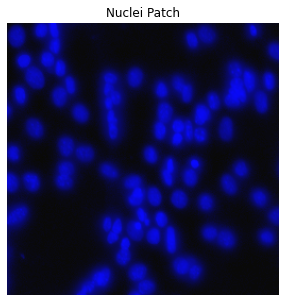

In [19]:
plt.figure(figsize=(5, 5))
plt.imshow(enhance_contrast_rgb(patches_n[0]))
plt.title('Nuclei Patch')
plt.axis('off')
plt.show()